In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sbn
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_learning_curves
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
from sklearn.model_selection import validation_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from numpy import where
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [2]:
# loading data

df= pd.read_csv('/home/jpozoc/barracuda/jpozoc/Master HMDA/Machine Learning/Trabajo 2/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

In [4]:
# dropping id and classification column
df.drop(['id','classification'], axis = 1, inplace = True)

In [5]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia']

In [6]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44,7800,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38,6000,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31,7500,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32,6700,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35,7300,4.6,no,no,no,good,no,no


In [7]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

### As we can see that 'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count' are object type. We need to change them to numerical dtype.


In [9]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [11]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [12]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values



### There is some ambiguity present in the columns we have to remove that.

In [13]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')


In [14]:
cols = ['diabetes_mellitus', 'coronary_artery_disease']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values



/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

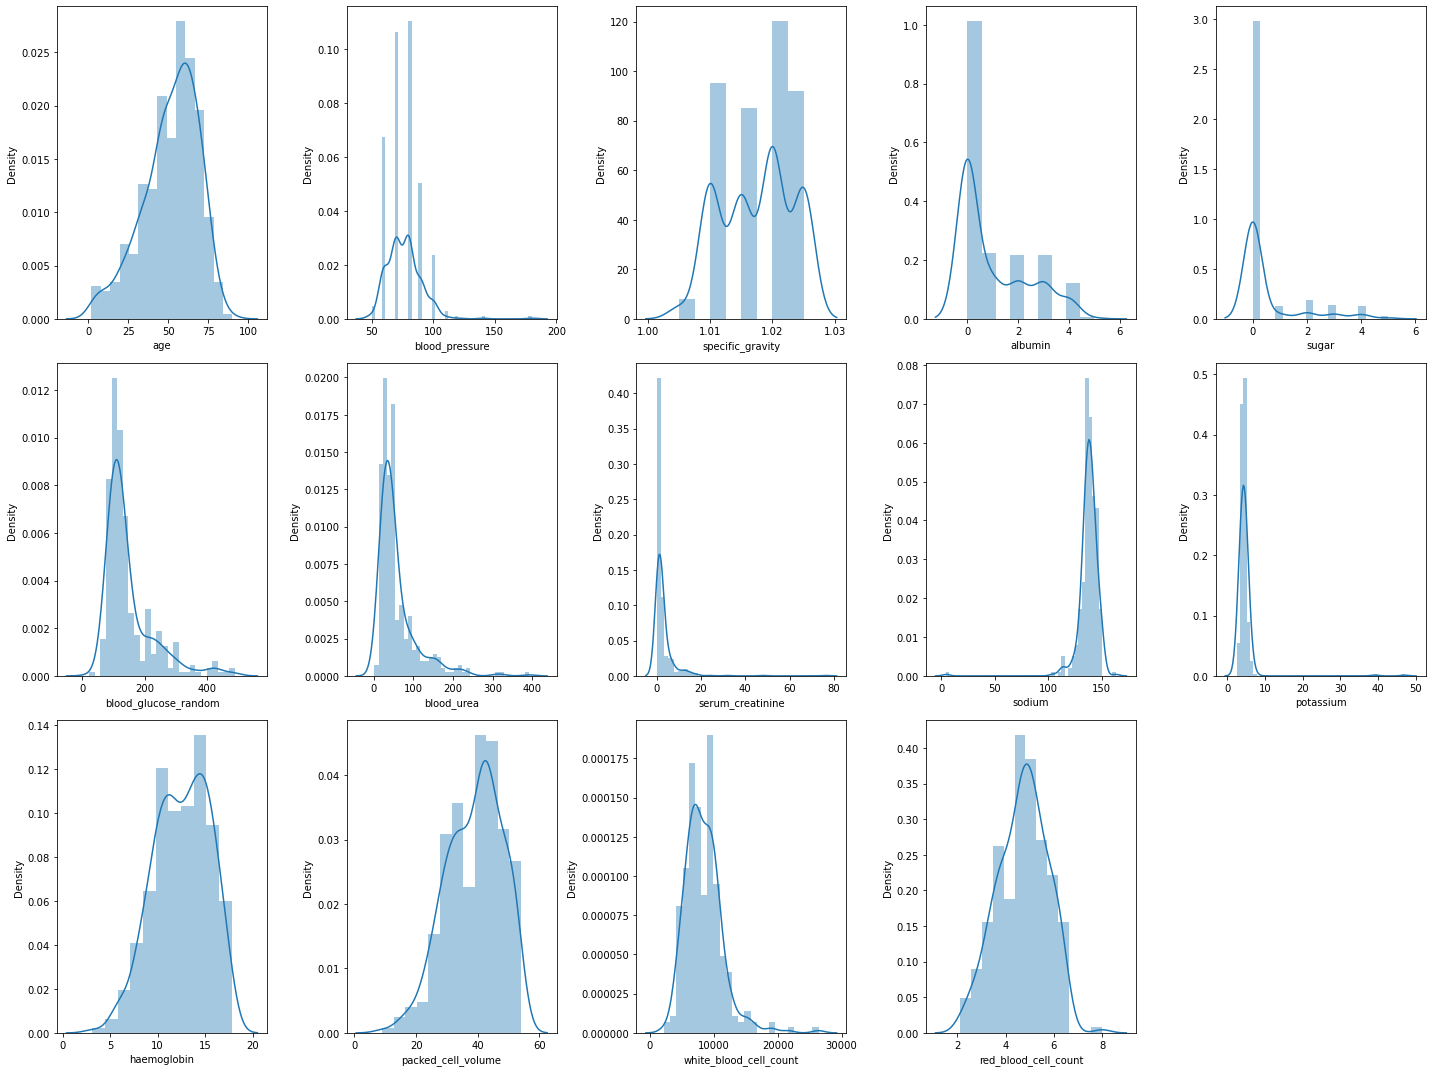

In [15]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

### Skewness is present in some of the columns.


/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jpozoc/miniconda3/envs/pyt3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

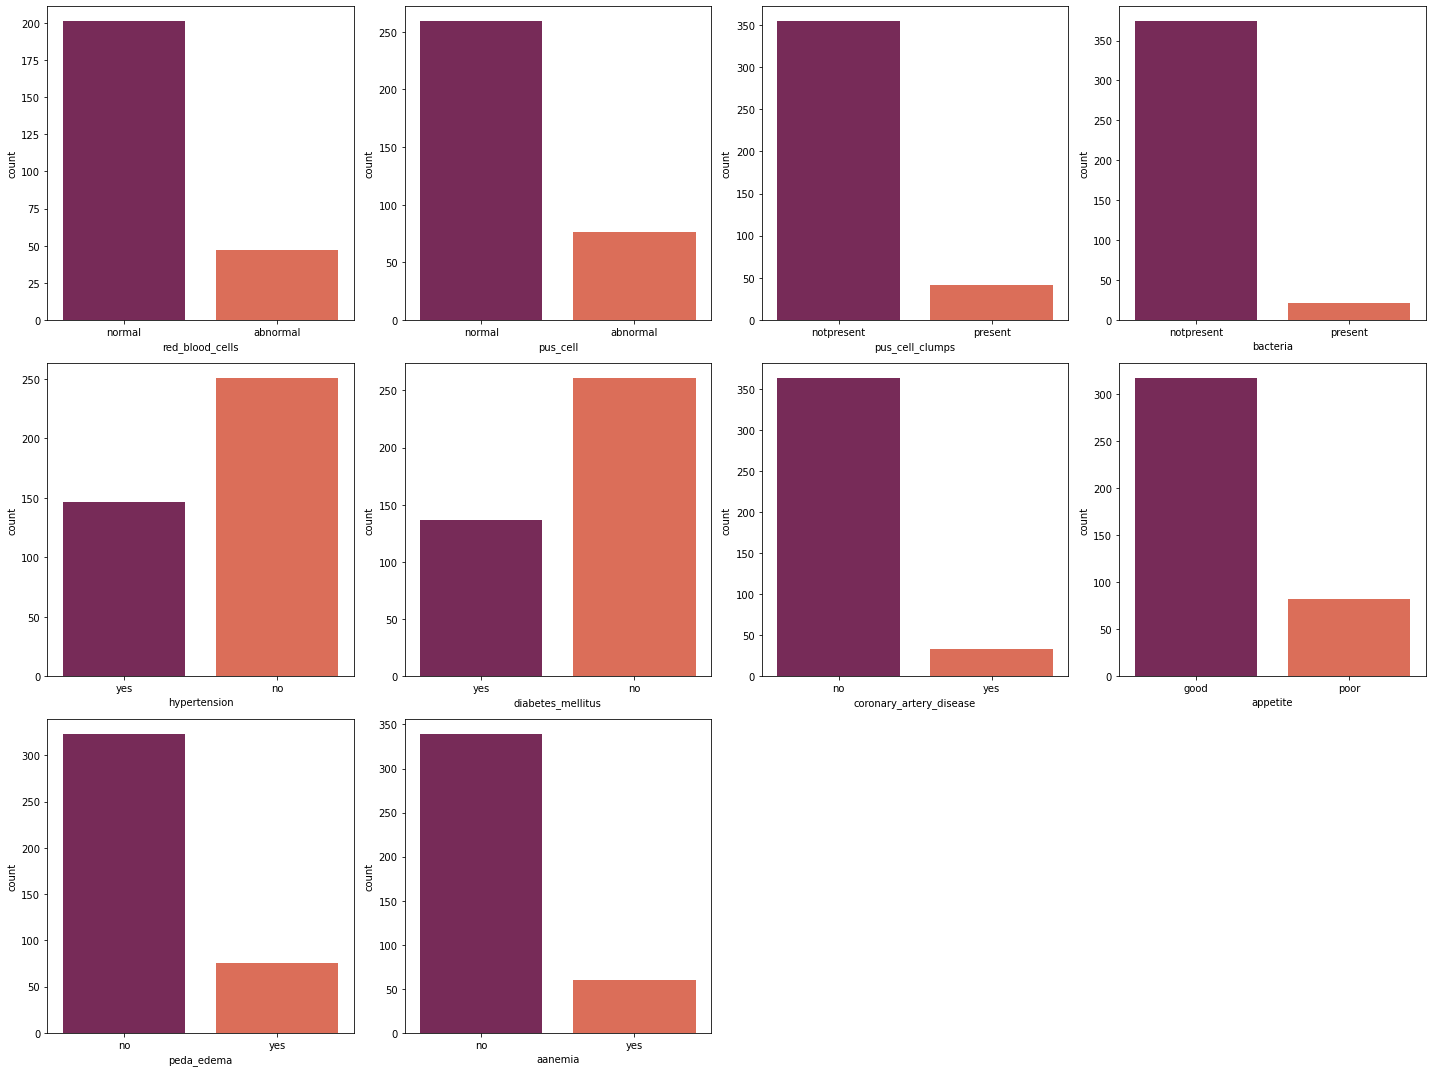

In [16]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

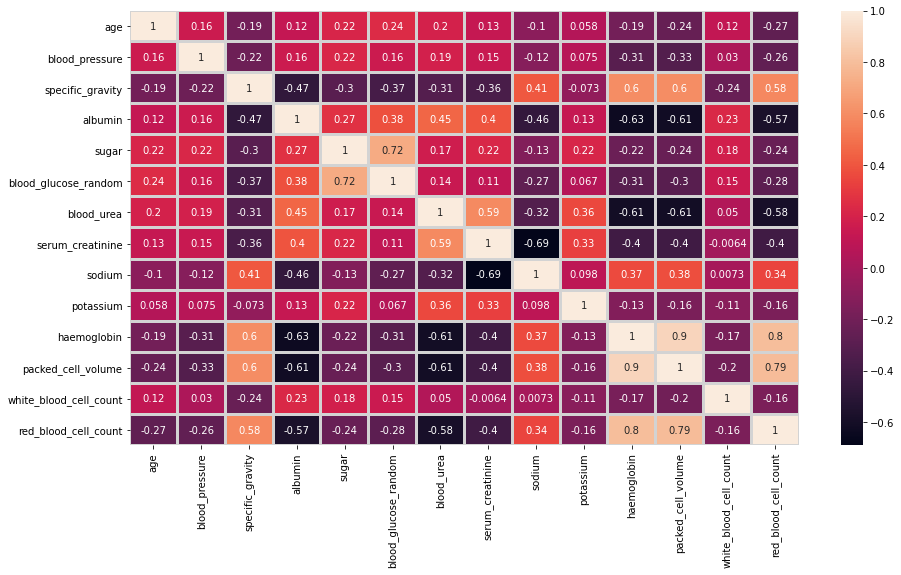

In [17]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.savefig('corr.png')
plt.show()

In [18]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia'],
      dtype='object')

# Data Preprocessing

In [19]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
dtype: int64

In [20]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [21]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
dtype: int64

In [22]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [23]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [24]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [25]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [26]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
dtype: int64

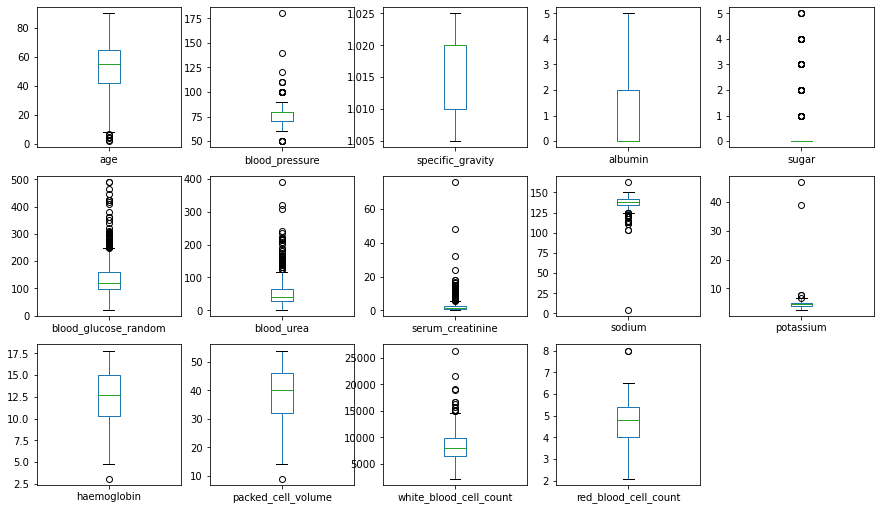

In [27]:
df.plot(kind='box',subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(15,15))
plt.show()

# Feature Encoding

In [28]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories



### Categorical columns >> one hot encoding


In [29]:
df['specific_gravity'] = df['specific_gravity'].astype('object')
df['albumin'] = df['albumin'].astype('object')
df['sugar'] = df['sugar'].astype('object')

In [30]:
categorical_features = []
numerical_features = []
for i in df.columns:
    if df[i].dtype == 'object':
        categorical_features.append(i)
    else:
        numerical_features.append(i)        

df= pd.get_dummies(df,columns=categorical_features)

In [31]:
df.columns

Index(['age', 'blood_pressure', 'blood_glucose_random', 'blood_urea',
       'serum_creatinine', 'sodium', 'potassium', 'haemoglobin',
       'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
       'specific_gravity_1.005', 'specific_gravity_1.01',
       'specific_gravity_1.015', 'specific_gravity_1.02',
       'specific_gravity_1.025', 'albumin_0.0', 'albumin_1.0', 'albumin_2.0',
       'albumin_3.0', 'albumin_4.0', 'albumin_5.0', 'sugar_0.0', 'sugar_1.0',
       'sugar_2.0', 'sugar_3.0', 'sugar_4.0', 'sugar_5.0',
       'red_blood_cells_abnormal', 'red_blood_cells_normal',
       'pus_cell_abnormal', 'pus_cell_normal', 'pus_cell_clumps_notpresent',
       'pus_cell_clumps_present', 'bacteria_notpresent', 'bacteria_present',
       'hypertension_no', 'hypertension_yes', 'diabetes_mellitus_no',
       'diabetes_mellitus_yes', 'coronary_artery_disease_no',
       'coronary_artery_disease_yes', 'appetite_good', 'appetite_poor',
       'peda_edema_no', 'peda_edema_

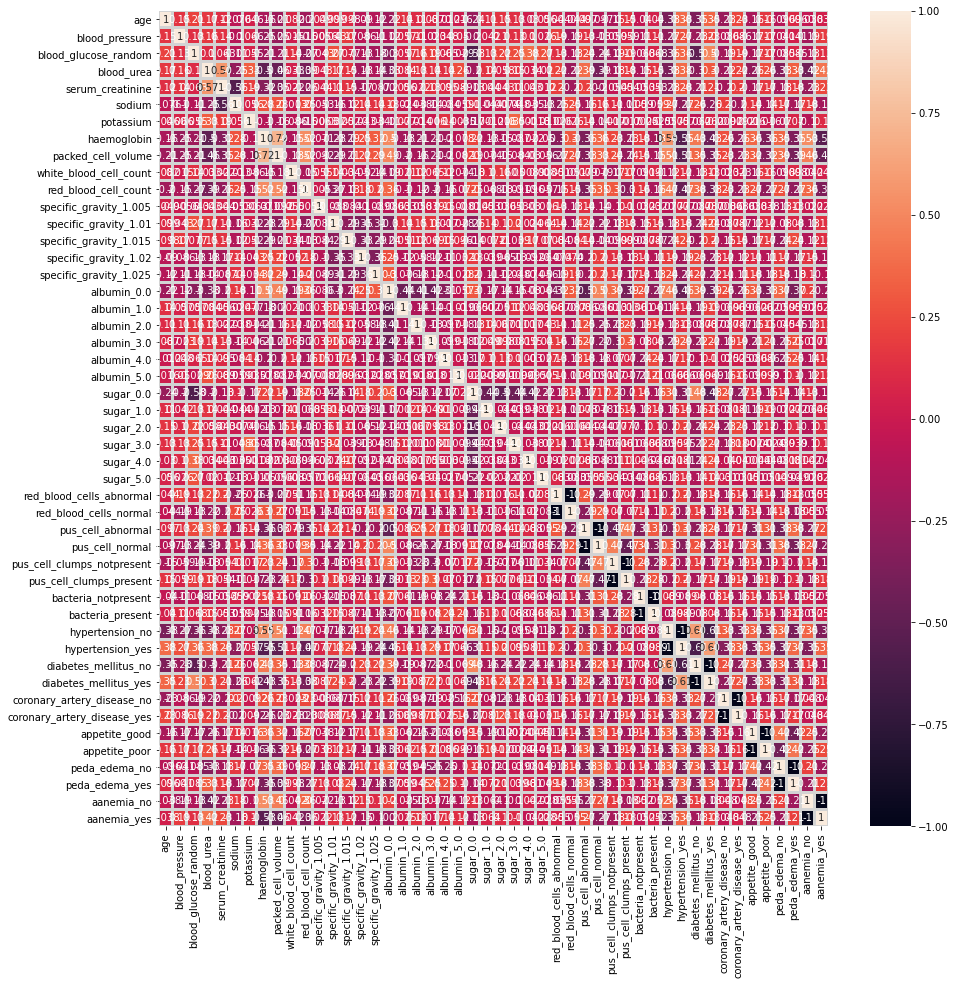

In [32]:
# heatmap of data

plt.figure(figsize = (15, 15))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.savefig('corr.png')
plt.show()

## Hierarchical Clustering

### 1. With all original variables

In [33]:
# Essentials:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# t-SNE visualization
from sklearn.manifold import TSNE

# imputation
from sklearn.impute import KNNImputer

# Scaling
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 

# PCA
from sklearn.decomposition import PCA

# K-means for Clustering
from sklearn.cluster import KMeans

# elbow method
from yellowbrick.cluster import KElbowVisualizer

# cluster metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

# Silhouette Visualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [34]:
df.head()

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,...,diabetes_mellitus_no,diabetes_mellitus_yes,coronary_artery_disease_no,coronary_artery_disease_yes,appetite_good,appetite_poor,peda_edema_no,peda_edema_yes,aanemia_no,aanemia_yes
0,48.0,80.0,121.0,36.0,1.2,142.0,4.9,15.4,44.0,7800.0,...,0,1,1,0,1,0,1,0,1,0
1,7.0,50.0,119.0,18.0,0.8,132.0,3.5,11.3,38.0,6000.0,...,1,0,1,0,1,0,1,0,1,0
2,62.0,80.0,423.0,53.0,1.8,140.0,4.5,9.6,31.0,7500.0,...,0,1,1,0,0,1,1,0,0,1
3,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,...,1,0,1,0,0,1,0,1,0,1
4,51.0,80.0,106.0,26.0,1.4,131.0,4.4,11.6,35.0,7300.0,...,1,0,1,0,1,0,1,0,1,0


In [35]:
# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(df)
X = pd.DataFrame(X,columns = df.columns)
print(X.shape)

(400, 48)


In [36]:
X.head()

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,...,diabetes_mellitus_no,diabetes_mellitus_yes,coronary_artery_disease_no,coronary_artery_disease_yes,appetite_good,appetite_poor,peda_edema_no,peda_edema_yes,aanemia_no,aanemia_yes
0,-0.214714,0.259991,-0.321414,-0.425592,-0.321515,0.444457,0.104505,0.989484,0.576891,-0.203708,...,-1.385535,1.385535,0.304789,-0.304789,0.507801,-0.507801,0.484322,-0.484322,0.420084,-0.420084
1,-2.610167,-1.952695,-0.347303,-0.782350,-0.392617,-0.564240,-0.387696,-0.426531,-0.086838,-0.841124,...,0.721743,-0.721743,0.304789,-0.304789,0.507801,-0.507801,0.484322,-0.484322,0.420084,-0.420084
2,0.603245,0.259991,3.587853,-0.088654,-0.214862,0.242718,-0.036124,-1.013660,-0.861187,-0.309944,...,-1.385535,1.385535,0.304789,-0.304789,-1.969276,1.969276,0.484322,-0.484322,-2.380476,2.380476
3,-0.214714,-0.477571,-0.373193,-0.029195,0.140649,-2.682503,-0.739268,-0.461068,-0.750566,-0.593240,...,0.721743,-0.721743,0.304789,-0.304789,-1.969276,1.969276,-2.064742,2.064742,-2.380476,2.380476
4,-0.039437,0.259991,-0.515583,-0.623791,-0.285964,-0.665109,-0.071281,-0.322921,-0.418702,-0.380768,...,0.721743,-0.721743,0.304789,-0.304789,0.507801,-0.507801,0.484322,-0.484322,0.420084,-0.420084


In [37]:
pca = PCA(n_components=2, random_state=42)
pca.fit(X)
X_pca = pd.DataFrame(pca.fit_transform(X))
X_pca.head()

,0,1
0,-0.555977,-1.979020
1,-1.892731,1.166383
2,3.062507,-2.140036
3,4.871582,4.037507
4,-1.106013,0.551545


In [38]:
X_pca[0]

0     -0.555977
1     -1.892731
2      3.062507
3      4.871582
4     -1.106013
         ...   
395   -3.077399
396   -3.817824
397   -3.513071
398   -3.519150
399   -3.513940
Name: 0, Length: 400, dtype: float64

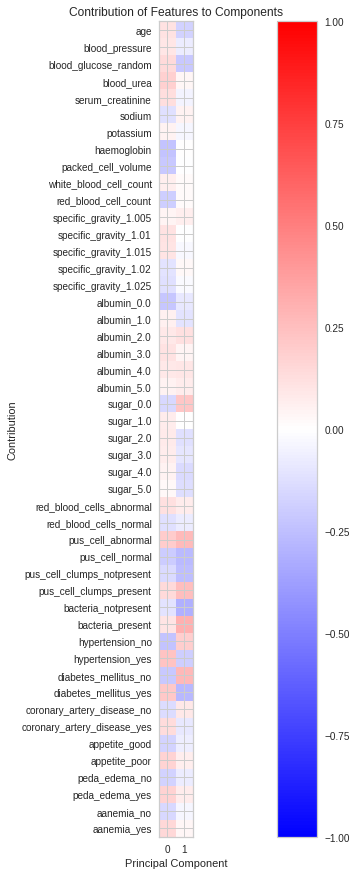

In [39]:
fig, ax = plt.subplots(figsize=(30, 15))
plt.imshow(pca.components_.T,
           cmap="bwr",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(len(X_pca.columns)), X_pca.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()
plt.savefig('X_pca.png')

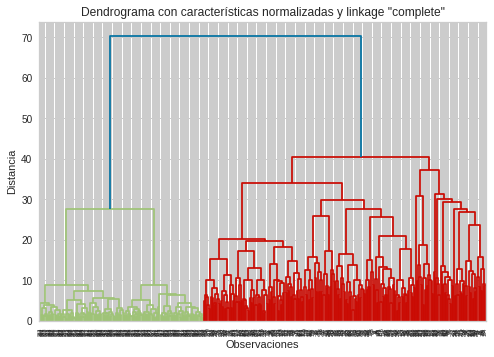

In [40]:


# Complete linkage

mergings = linkage(X, method="ward", metric='euclidean')
dendrogram(mergings)

plt.title('Dendrograma con características normalizadas y linkage "complete"')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
plt.savefig('dendrograma1.png')
plt.show()

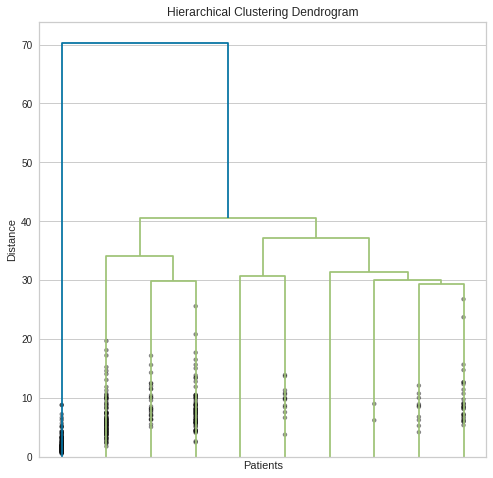

In [41]:
plt.figure(figsize=(8, 8))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Patients')
plt.ylabel('Distance')

dendrogram(
    linkage(X, method = 'ward'),
    truncate_mode='lastp',
    p=10,
    show_leaf_counts=False,
    show_contracted=True,
    no_labels = True
)
plt.savefig('dendrogram2.png')
plt.show()

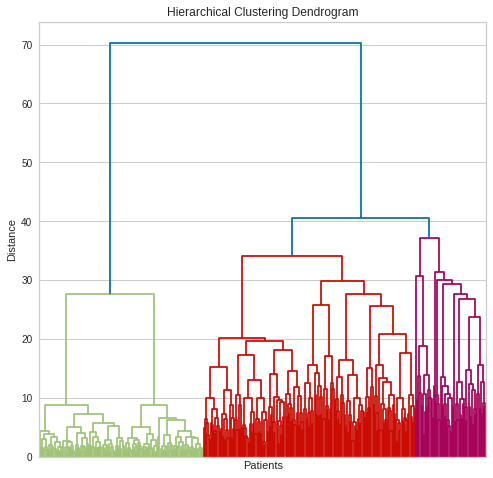

In [42]:
plt.figure(figsize=(8, 8))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Patients')
plt.ylabel('Distance')

dendrogram(
    linkage(X, method = 'ward'),
    no_labels = True,
    color_threshold=40
)
plt.savefig('dendrogram3.png')

plt.show()

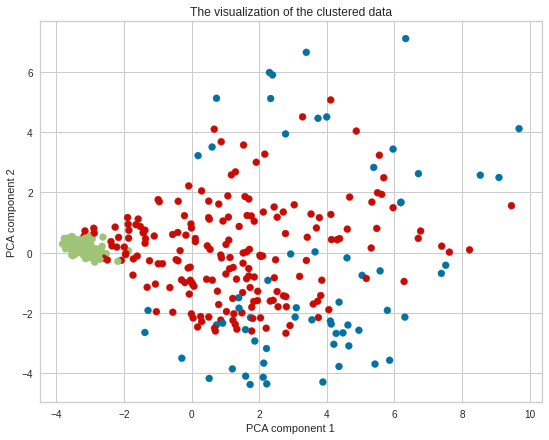

In [43]:
from sklearn.cluster import AgglomerativeClustering

hcluster = AgglomerativeClustering(n_clusters = 3,
                                   affinity = 'euclidean',
                                   linkage = 'ward')
hcluster.fit_predict(X)

plt.figure(figsize=(9, 7))

colors = { 0: 'b',
           1: 'g',
           2: 'r'}

label_color = [colors[l] for l in hcluster.labels_]

scatter = plt.scatter(X_pca[0], 
            X_pca[1],
            c=label_color
)

plt.title("The visualization of the clustered data")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.savefig('scatter_hierarchical.png')    
plt.show()

In [44]:
hmodel = AgglomerativeClustering(n_clusters = 3,
                                   affinity = 'euclidean',
                                   linkage = 'ward')
labels = hmodel.fit_predict(X)

In [45]:
df.head()

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,...,diabetes_mellitus_no,diabetes_mellitus_yes,coronary_artery_disease_no,coronary_artery_disease_yes,appetite_good,appetite_poor,peda_edema_no,peda_edema_yes,aanemia_no,aanemia_yes
0,48.0,80.0,121.0,36.0,1.2,142.0,4.9,15.4,44.0,7800.0,...,0,1,1,0,1,0,1,0,1,0
1,7.0,50.0,119.0,18.0,0.8,132.0,3.5,11.3,38.0,6000.0,...,1,0,1,0,1,0,1,0,1,0
2,62.0,80.0,423.0,53.0,1.8,140.0,4.5,9.6,31.0,7500.0,...,0,1,1,0,0,1,1,0,0,1
3,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,...,1,0,1,0,0,1,0,1,0,1
4,51.0,80.0,106.0,26.0,1.4,131.0,4.4,11.6,35.0,7300.0,...,1,0,1,0,1,0,1,0,1,0


In [46]:


# Assign cluster labels

df['labels'] = labels
X['labels'] = labels
X_pca['labels'] = labels
df.head()



,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,...,diabetes_mellitus_yes,coronary_artery_disease_no,coronary_artery_disease_yes,appetite_good,appetite_poor,peda_edema_no,peda_edema_yes,aanemia_no,aanemia_yes,labels
0,48.0,80.0,121.0,36.0,1.2,142.0,4.9,15.4,44.0,7800.0,...,1,1,0,1,0,1,0,1,0,2
1,7.0,50.0,119.0,18.0,0.8,132.0,3.5,11.3,38.0,6000.0,...,0,1,0,1,0,1,0,1,0,2
2,62.0,80.0,423.0,53.0,1.8,140.0,4.5,9.6,31.0,7500.0,...,1,1,0,0,1,1,0,0,1,0
3,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,...,0,1,0,0,1,0,1,0,1,2
4,51.0,80.0,106.0,26.0,1.4,131.0,4.4,11.6,35.0,7300.0,...,0,1,0,1,0,1,0,1,0,2


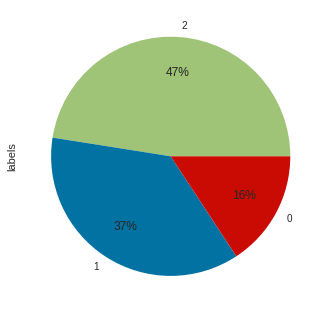

In [47]:
label = ['0', '1', '2']

colours = {'1': 'b',
           '0': 'g',
           '2': 'r'}
X.labels.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1, colors=[colours[key] for key in label])
plt.savefig('dist_hierarchical.png')

## Evaluate the model

In [48]:
print(f'Silhouette Score = {silhouette_score(X, labels)}')

Silhouette Score = 0.14641405732938265


Para AGRUP JERARQUICO con n_clusters = 3 , el valor medio de la silueta es: 0.14641405732938265


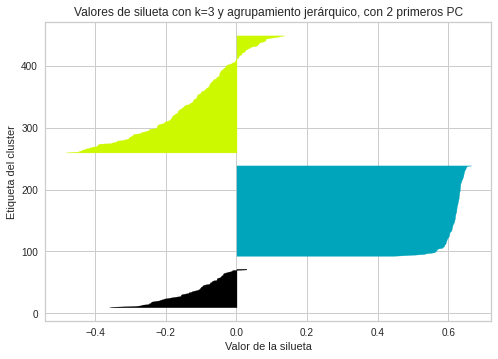

In [49]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
n_clusters = 3


silhouette_avg_norm = silhouette_score(X, labels)
print("Para AGRUP JERARQUICO con n_clusters =", n_clusters,", el valor medio de la silueta es:", silhouette_avg_norm)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values_hc = silhouette_samples(X, labels)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values = \
        sample_silhouette_values_hc[labels == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=3 y agrupamiento jerárquico, con 2 primeros PC')
plt.savefig('silhouette_hierarchical.png')

plt.show() 

### PCA's vs Labels

In [50]:


def spider_plot(data, title):
    means = data.groupby("labels").mean().to_numpy()
    names = data.columns[0:-1]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(names))
    categories = np.arange(0, len(means))
    plt.figure(figsize=(10,10))
    plt.subplot(polar=True)
    for i in range(len(means)):
        plt.plot(label_loc, means[i], label=f'class {categories[i]}')
    plt.title(f'Feature comparison ({title})', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)
    plt.legend()
    plt.savefig(title+'.png')
    plt.show()

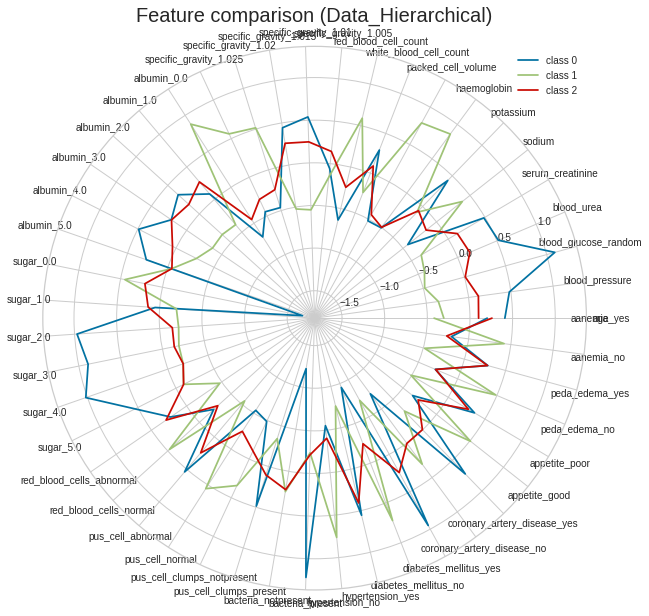

In [51]:
spider_plot(X, 'Data_Hierarchical')

## Partitional Clustering (K-Means)

In [52]:
df = df.drop('labels',axis=1)
X = X.drop('labels',axis=1)

In [84]:
pca = PCA(n_components=2, random_state=42)
pca.fit(X)
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
X_pca = pd.DataFrame(pca.fit_transform(X), columns=PC_names)
X_pca.head()

,PC1,PC2
0,-0.555977,-1.979020
1,-1.892731,1.166383
2,3.062507,-2.140036
3,4.871582,4.037507
4,-1.106013,0.551545


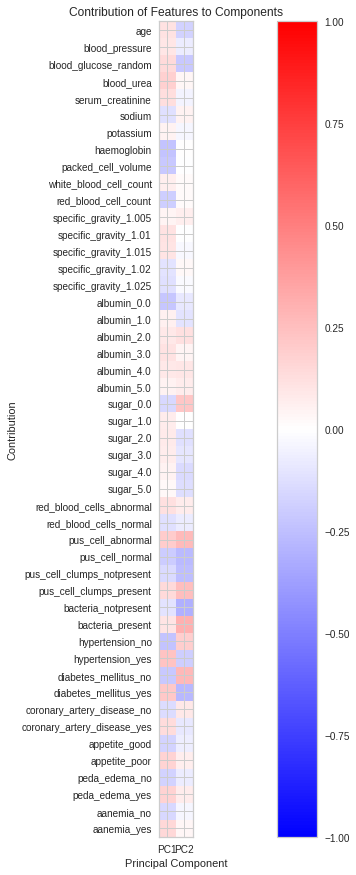

In [85]:
fig, ax = plt.subplots(figsize=(30, 15))
plt.imshow(pca.components_.T,
           cmap="bwr",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(len(X_pca.columns)), X_pca.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")

plt.colorbar()
plt.savefig('X_pca2.png')

In [86]:
kmeans = KMeans()
kmeans.fit(X)

KMeans()

In [87]:
# Normalizing continuous data

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(df)
X = pd.DataFrame(X,columns = df.columns)
print(X.shape)

(400, 48)


Statistics from the initialization run with the lowest SSE are available as attributes of kmeans after calling .fit().

In [88]:
# The lowest SSE value
print(kmeans.inertia_)

12692.86372237972


In [89]:
# Final locations of the centroid
print(kmeans.cluster_centers_)

[[-4.79716495e-01 -2.00985607e-01 -4.13760107e-01 -4.43376945e-01
  -2.65252347e-01  2.50823246e-01 -8.60347414e-02  6.17903176e-01
   5.27505957e-01 -1.34464484e-01  4.23789712e-01 -1.60128154e-01
  -8.53911125e-02 -1.97339384e-01 -6.39101482e-01  1.01548990e+00
   5.89286402e-01 -2.80359059e-01 -1.64565483e-01 -2.86847135e-01
  -1.97870232e-01 -5.00626174e-02  3.52913936e-01 -1.03392409e-01
  -2.23313158e-01 -1.97385508e-01 -9.32793534e-02 -1.00503782e-01
  -2.64443372e-01  2.64443372e-01 -4.65846564e-01  4.65846564e-01
   2.84266464e-01 -2.84266464e-01  2.41248955e-01 -2.41248955e-01
   7.43732474e-01 -7.43732474e-01  6.65297769e-01 -6.65297769e-01
   3.04788738e-01 -3.04788738e-01  4.19333748e-01 -4.19333748e-01
   4.16043613e-01 -4.16043613e-01  3.20064019e-01 -3.20064019e-01]
 [ 5.26079076e-01  2.53032425e-01  5.71640638e-01  3.00966652e-02
   6.09944237e-02 -1.16987408e-01 -6.39844833e-02 -3.94926852e-01
  -3.46693670e-01  1.60100732e-01 -2.97991294e-01  8.15747199e-02
   2.5358

In [90]:
 # The number of iterations required to converge
print(kmeans.n_iter_)

10


### Choosing K with elbow method

In [91]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

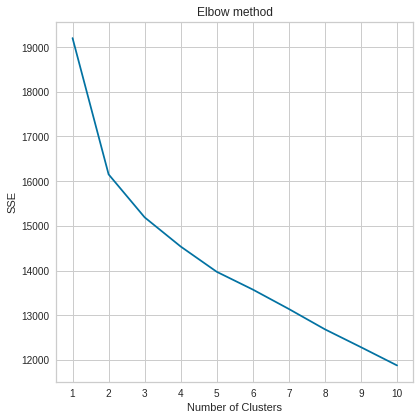

In [92]:
plt.figure(figsize=(6,6))
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.title("Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.tight_layout()
plt.show()

In [93]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), 
                 sse, 
                 curve="convex", 
                 direction="decreasing")
kl.elbow

3

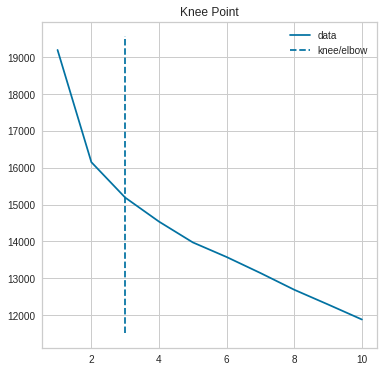

In [94]:
kl.plot_knee()
plt.savefig('elbow1.png')

### Choosing K with silhouette coefficient

In [95]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit_predict(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

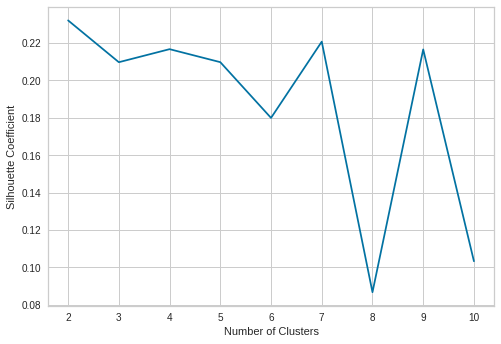

In [96]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [97]:
X.head()

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,...,diabetes_mellitus_no,diabetes_mellitus_yes,coronary_artery_disease_no,coronary_artery_disease_yes,appetite_good,appetite_poor,peda_edema_no,peda_edema_yes,aanemia_no,aanemia_yes
0,-0.214714,0.259991,-0.321414,-0.425592,-0.321515,0.444457,0.104505,0.989484,0.576891,-0.203708,...,-1.385535,1.385535,0.304789,-0.304789,0.507801,-0.507801,0.484322,-0.484322,0.420084,-0.420084
1,-2.610167,-1.952695,-0.347303,-0.782350,-0.392617,-0.564240,-0.387696,-0.426531,-0.086838,-0.841124,...,0.721743,-0.721743,0.304789,-0.304789,0.507801,-0.507801,0.484322,-0.484322,0.420084,-0.420084
2,0.603245,0.259991,3.587853,-0.088654,-0.214862,0.242718,-0.036124,-1.013660,-0.861187,-0.309944,...,-1.385535,1.385535,0.304789,-0.304789,-1.969276,1.969276,0.484322,-0.484322,-2.380476,2.380476
3,-0.214714,-0.477571,-0.373193,-0.029195,0.140649,-2.682503,-0.739268,-0.461068,-0.750566,-0.593240,...,0.721743,-0.721743,0.304789,-0.304789,-1.969276,1.969276,-2.064742,2.064742,-2.380476,2.380476
4,-0.039437,0.259991,-0.515583,-0.623791,-0.285964,-0.665109,-0.071281,-0.322921,-0.418702,-0.380768,...,0.721743,-0.721743,0.304789,-0.304789,0.507801,-0.507801,0.484322,-0.484322,0.420084,-0.420084


### Visualizing

In [98]:
X_pca.head()

,PC1,PC2
0,-0.555977,-1.979020
1,-1.892731,1.166383
2,3.062507,-2.140036
3,4.871582,4.037507
4,-1.106013,0.551545


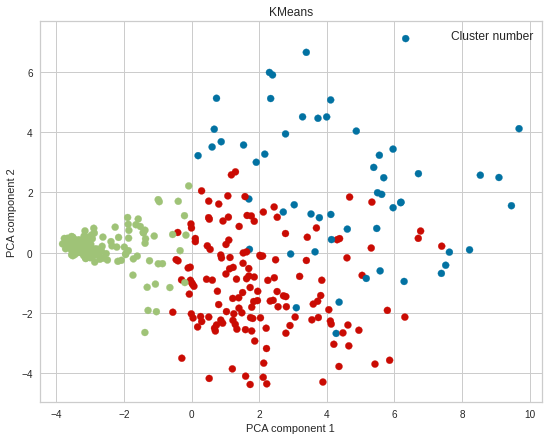

In [99]:
km_model = KMeans(3, random_state=42)
labels = km_model.fit_predict(X)

plt.figure(figsize=(9, 7))


colors = { 0: 'b',
           1: 'g',
           2: 'r'}

label_color = [colors[l] for l in labels]

scatter = plt.scatter(X_pca['PC1'], 
                      X_pca['PC2'],
                      c=label_color)




plt.title("KMeans")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")

plt.legend(*scatter.legend_elements(), 
           title='Cluster number')
plt.savefig('scatter_kmeans.png')
    
plt.show()

### Evaluate the model

In [100]:
km_model = KMeans(3, random_state=42)
labels = km_model.fit_predict(X)

In [101]:
df['labels'] = labels
X_pca['labels'] = labels
X['labels'] = labels

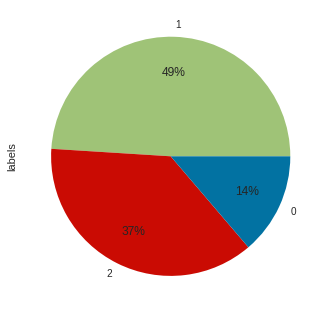

In [102]:
label = ['0', '1', '2']

colours = {'2': 'b',
           '0': 'g',
           '1': 'r'}
X.labels.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1, colors=[colours[key] for key in label])
plt.savefig('dist_kmeans.png')

In [72]:
print(f'Silhouette Score = {silhouette_score(X, labels)}')

Silhouette Score = 0.21710644402737375


Para AGRUP JERARQUICO con n_clusters = 3 , el valor medio de la silueta es: 0.21710644402737375


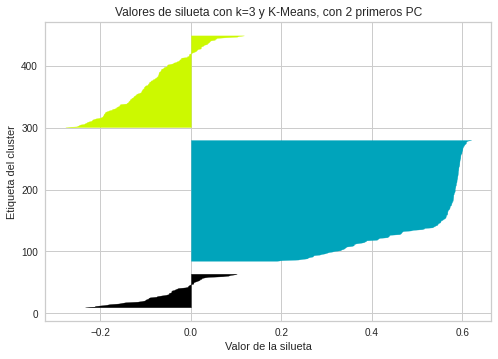

In [76]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
n_clusters = 3


silhouette_avg_norm = silhouette_score(X, labels)
print("Para AGRUP JERARQUICO con n_clusters =", n_clusters,", el valor medio de la silueta es:", silhouette_avg_norm)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values_hc = silhouette_samples(X, labels)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values = \
        sample_silhouette_values_hc[labels == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=3 y K-Means, con 2 primeros PC')
plt.savefig('silhouette_kmeans.png')

plt.show() 

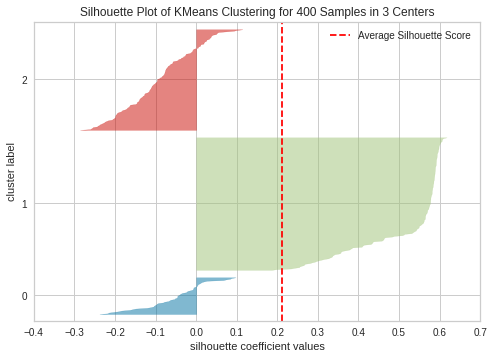

<Figure size 576x396 with 0 Axes>

In [75]:
visualizer = SilhouetteVisualizer(km_model, colors='yellowbrick')
visualizer.fit(X.drop(['labels'],axis=1))
plt.savefig('silhouette_kmeans.png')
visualizer.show()
plt.savefig('silhouette_kmeans.png')

In [74]:
"""
def spider_plot(data, title):
    means = data.groupby("labels").mean().to_numpy()
    names = data.columns[0:-1]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(names))
    categories = np.arange(0, len(means))
    plt.figure(figsize=(10,10))
    plt.subplot(polar=True)
    for i in range(len(means)):
        plt.plot(label_loc, means[i], label=f'class {categories[i]}')
    plt.title(f'Feature comparison ({title})', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)
    plt.legend()
    plt.show()
"""

'\ndef spider_plot(data, title):\n    means = data.groupby("labels").mean().to_numpy()\n    names = data.columns[0:-1]\n    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(names))\n    categories = np.arange(0, len(means))\n    plt.figure(figsize=(10,10))\n    plt.subplot(polar=True)\n    for i in range(len(means)):\n        plt.plot(label_loc, means[i], label=f\'class {categories[i]}\')\n    plt.title(f\'Feature comparison ({title})\', size=20)\n    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)\n    plt.legend()\n    plt.show()\n'

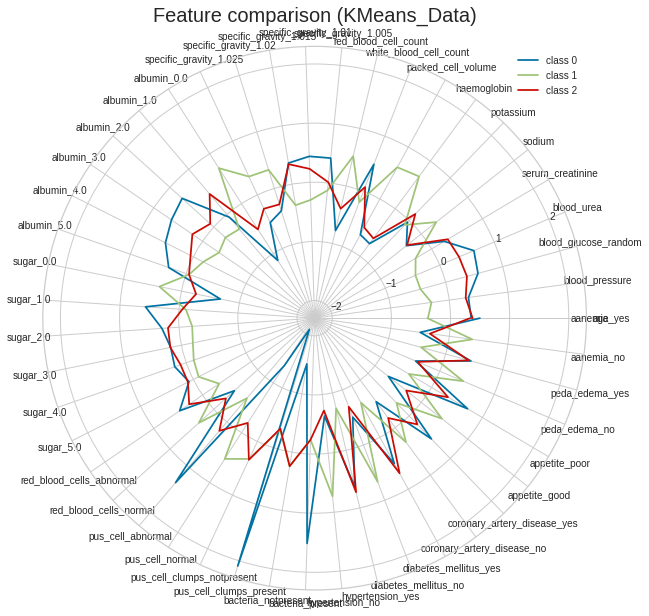

In [77]:
spider_plot(X, 'KMeans_Data')

## Gaussian Model

In [103]:
from sklearn.mixture import GaussianMixture 

In [104]:
df = df.drop('labels',axis=1)
X = X.drop('labels',axis=1)
df.head()

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,...,diabetes_mellitus_no,diabetes_mellitus_yes,coronary_artery_disease_no,coronary_artery_disease_yes,appetite_good,appetite_poor,peda_edema_no,peda_edema_yes,aanemia_no,aanemia_yes
0,48.0,80.0,121.0,36.0,1.2,142.0,4.9,15.4,44.0,7800.0,...,0,1,1,0,1,0,1,0,1,0
1,7.0,50.0,119.0,18.0,0.8,132.0,3.5,11.3,38.0,6000.0,...,1,0,1,0,1,0,1,0,1,0
2,62.0,80.0,423.0,53.0,1.8,140.0,4.5,9.6,31.0,7500.0,...,0,1,1,0,0,1,1,0,0,1
3,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,...,1,0,1,0,0,1,0,1,0,1
4,51.0,80.0,106.0,26.0,1.4,131.0,4.4,11.6,35.0,7300.0,...,1,0,1,0,1,0,1,0,1,0


In [105]:
pca = PCA(n_components=2, random_state=42)
pca.fit(X)
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
X_pca = pd.DataFrame(pca.fit_transform(X), columns=PC_names)
X_pca.head()

,PC1,PC2
0,-0.555977,-1.979020
1,-1.892731,1.166383
2,3.062507,-2.140036
3,4.871582,4.037507
4,-1.106013,0.551545


In [106]:
pca.explained_variance_ratio_

array([0.21297859, 0.05970944])

In [107]:
gmm = GaussianMixture(n_components = 3) 
gmm.fit(X)

GaussianMixture(n_components=3)

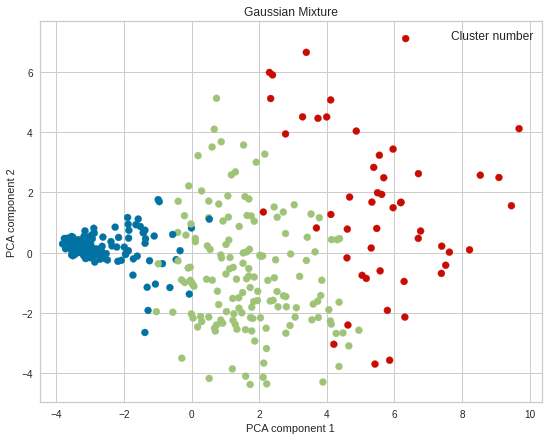

In [135]:

labels = gmm.fit_predict(X)

plt.figure(figsize=(9, 7))

colors = { 0: 'b',
           1: 'g',
           2: 'r'}

label_color = [colors[l] for l in labels]

scatter = plt.scatter(X_pca['PC1'], 
                      X_pca['PC2'],
                      c=label_color)




plt.title("Gaussian Mixture")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")

plt.legend(*scatter.legend_elements(), 
           title='Cluster number')
plt.savefig('scatter_gaussian.png')
    
plt.show()

In [136]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

for k in range(2, 11):
    gmm = GaussianMixture(k)
    labels = gmm.fit_predict(X)
    #labels=gmm.predict(X_pca)
    score = silhouette_score(X, labels)
    silhouette_coefficients.append(score)

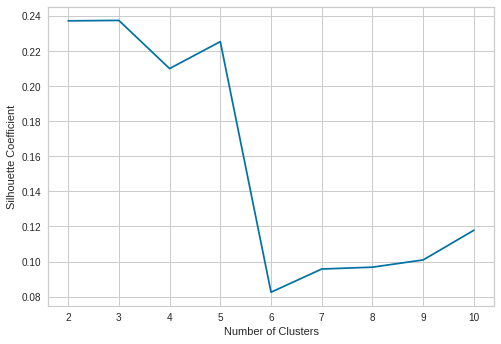

In [137]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.savefig('silhouetecoef_gaussian.png')
plt.show()

In [139]:
gmm = GaussianMixture(n_components = 3,random_state=42) 
gmm.fit(X)

GaussianMixture(n_components=3, random_state=42)

In [140]:
labels = gmm.fit_predict(X)
df['labels'] = labels
X_pca['labels'] = labels
X['labels'] = labels

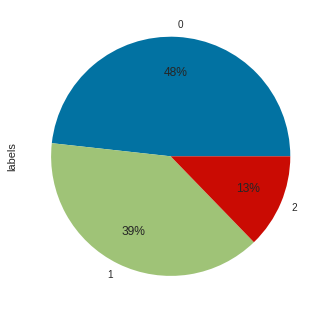

In [141]:
X.labels.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)
plt.savefig('dist_gasussian.png')

In [142]:
print(f'Silhouette Score = {silhouette_score(X, labels)}')

Silhouette Score = 0.20419424150546406


Para AGRUP JERARQUICO con n_clusters = 3 , el valor medio de la silueta es: 0.20419424150546406


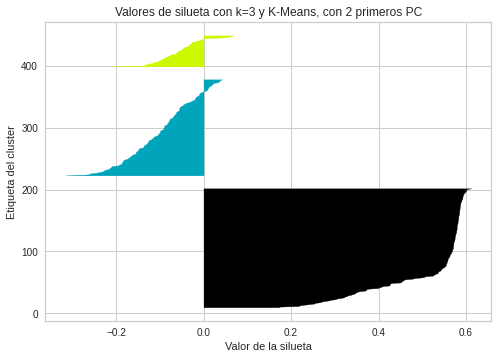

In [144]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
n_clusters = 3


silhouette_avg_norm = silhouette_score(X, labels)
print("Para AGRUP JERARQUICO con n_clusters =", n_clusters,", el valor medio de la silueta es:", silhouette_avg_norm)


# Obtenemos el valor de la silueta para cada observación
sample_silhouette_values_hc = silhouette_samples(X, labels)

# Representamos esos valores
plt.figure()

y_lower = 10
for i in range(n_clusters):
    # Consideramos los valores de silueta asociados a muestras de un único cluster
    ith_cluster_silhouette_values = \
        sample_silhouette_values_hc[labels == i]

    # Ordenamos los valores de la silueta
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color) 

    # Calculamos el nuevo y_lower para la siguiente representacioón de los valores de la silueta
    y_lower = y_upper + 20  


plt.xlabel('Valor de la silueta')
plt.ylabel('Etiqueta del cluster')
plt.title('Valores de silueta con k=3 y K-Means, con 2 primeros PC')
plt.savefig('silhouette_gaussian.png')

plt.show() 

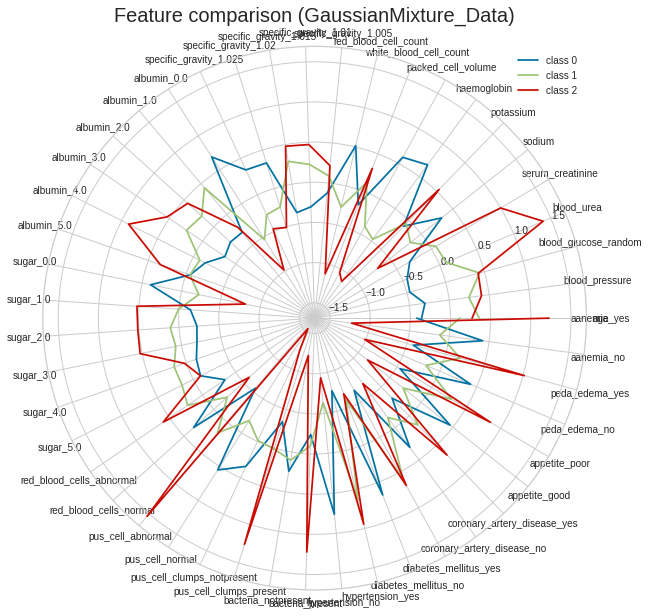

In [143]:
spider_plot(X, 'GaussianMixture_Data')